In [35]:
#First import all packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree,metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Titanic = pd.read_csv('titanic.csv')
Titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


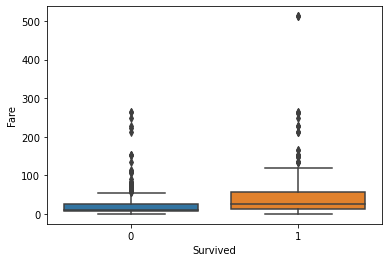

In [36]:
sns.boxplot(x='Survived',y='Fare',data=Titanic)
plt.show()

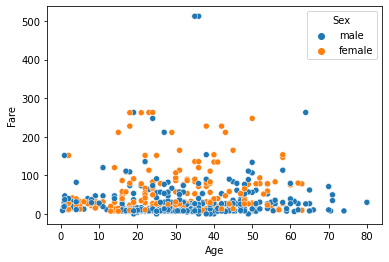

In [37]:
sns.scatterplot(x='Age',y='Fare',hue = 'Sex',data=Titanic);

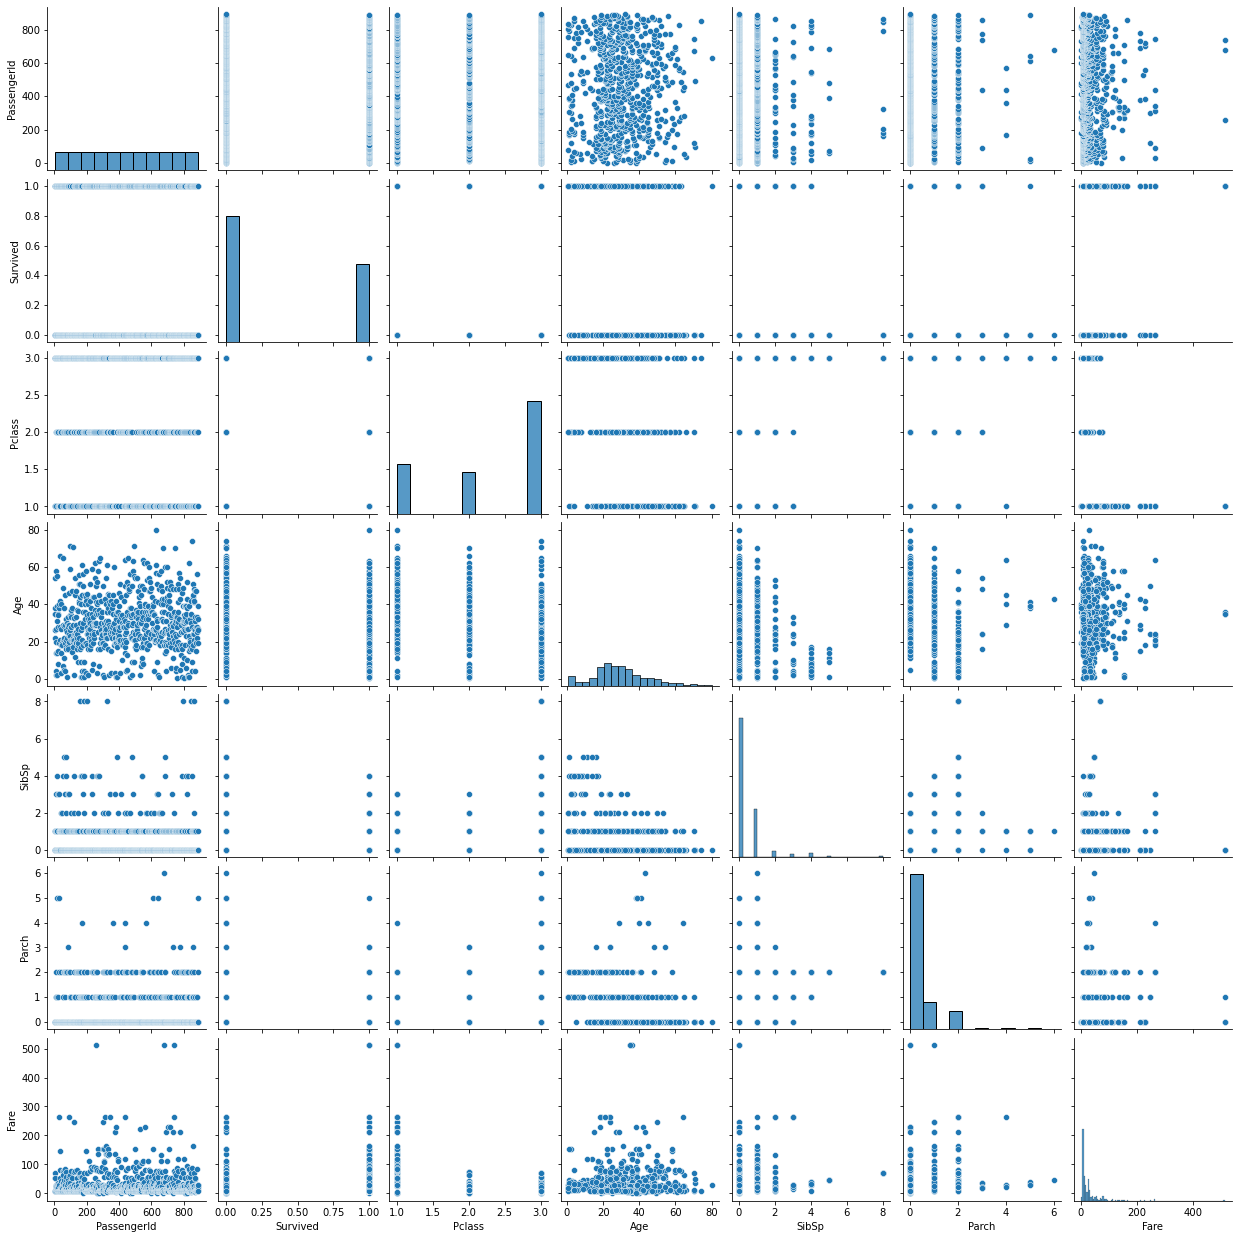

In [39]:
sns.pairplot(Titanic)

<AxesSubplot:>

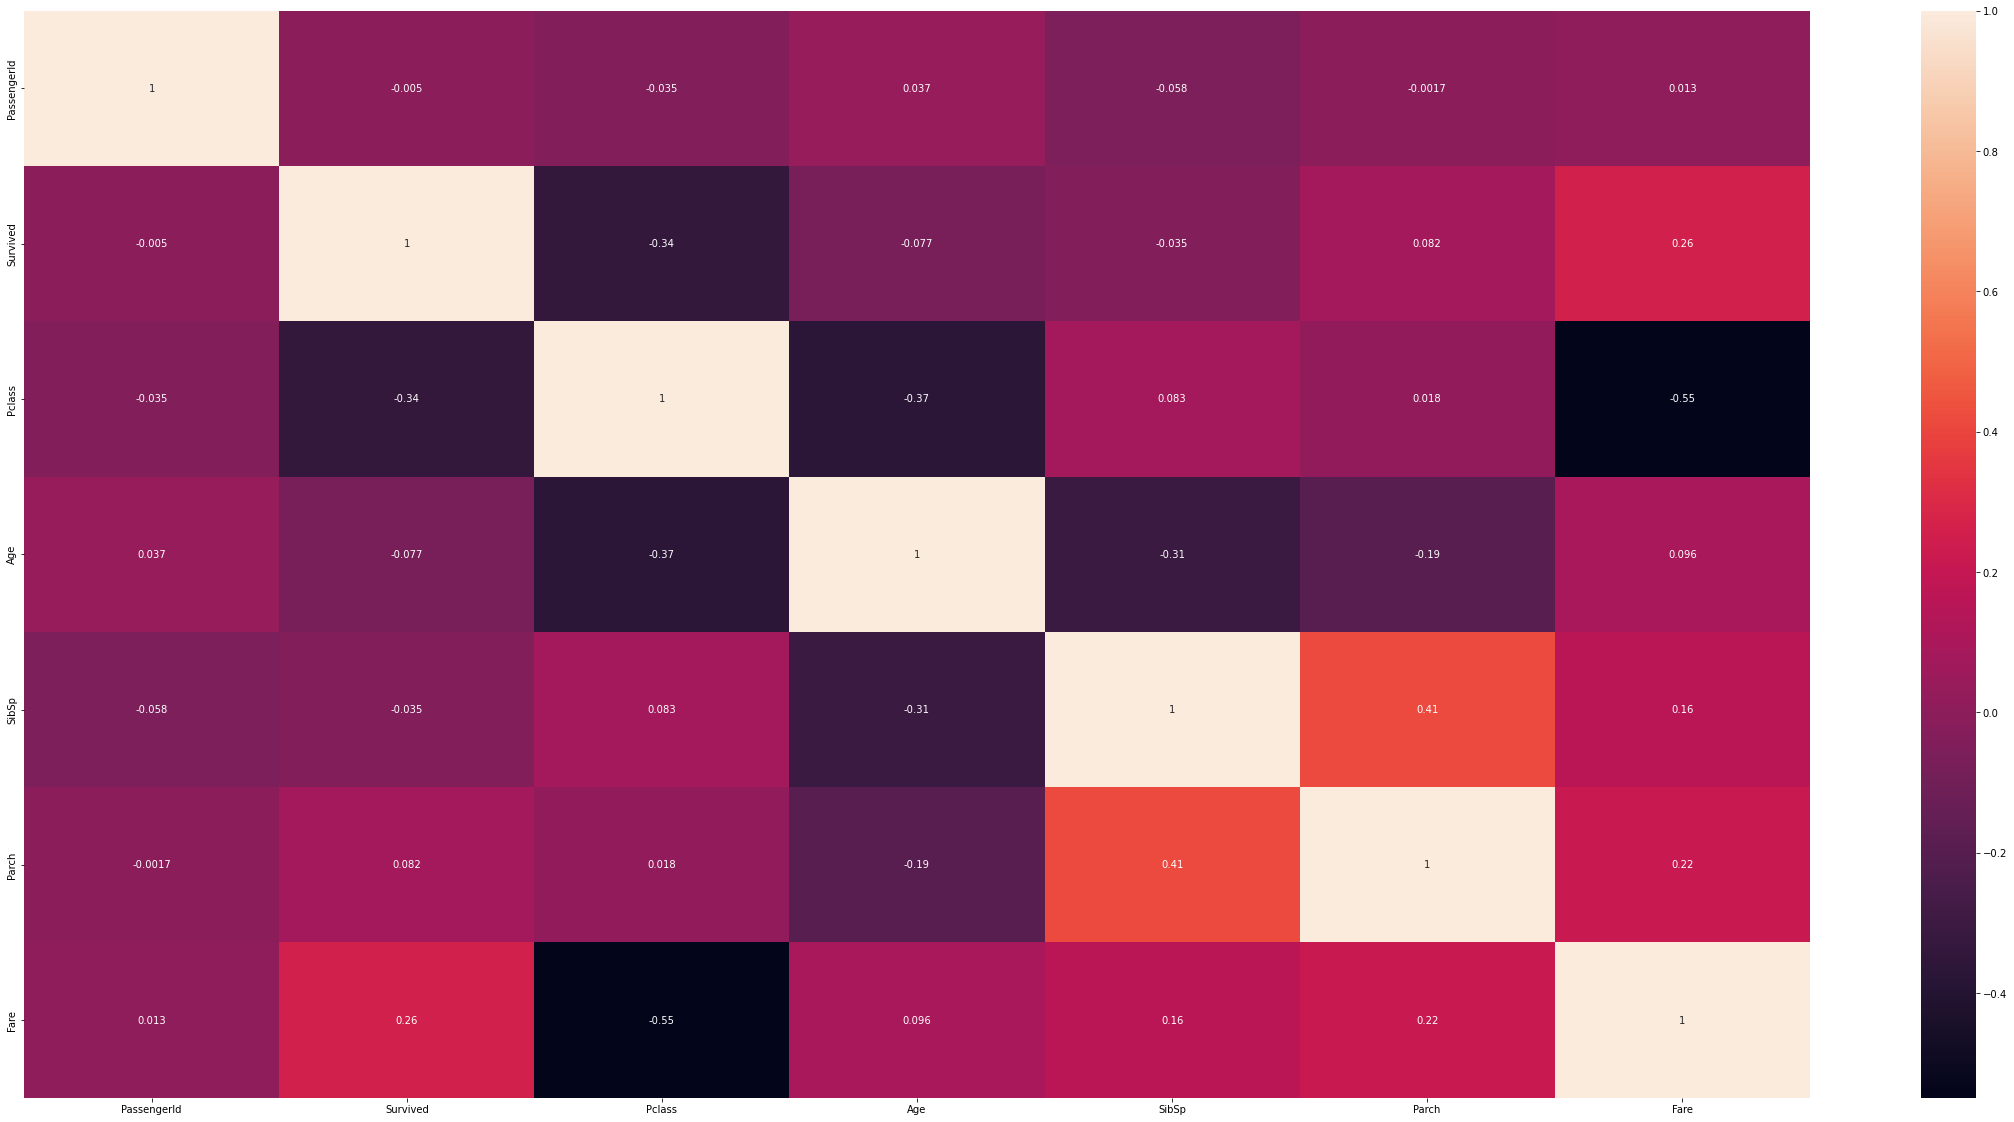

In [40]:
plt.figure(figsize = (40,20))
sns.heatmap(Titanic.corr(),annot=True)

In [3]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
Data = Titanic[['Survived','Pclass','Sex','Age','Fare']]

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [17]:
Data_1 = Data.dropna()

In [18]:
Data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB


In [21]:
Data_1.shape

(714, 5)

In [22]:
X = Data_1[['Pclass','Sex','Age','Fare']]
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
885,3,female,39.0,29.1250
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
889,1,male,26.0,30.0000


In [23]:
X['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
y = Data_1['Survived']

In [25]:
X = pd.get_dummies(X)
X

,Pclass,Age,Fare,Sex_female,Sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
885,3,39.0,29.1250,1,0
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
889,1,26.0,30.0000,0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=123)
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
model.score(X_test,y_test)

0.770949720670391

In [28]:
y_pred = model.predict(X_test)

In [31]:
print(metrics.accuracy_score(y_test,y_pred))

0.770949720670391


In [52]:
import numpy as np
A1 = np.array(X_train['Age'])
A2 = np.array(y_train)

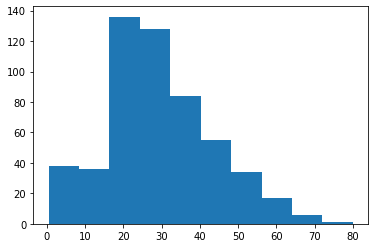

In [57]:
plt.hist(X_train['Age']);

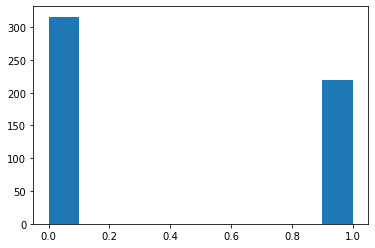

In [58]:
plt.hist(y_train);

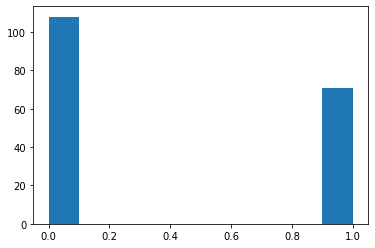

In [59]:
plt.hist(y_test);

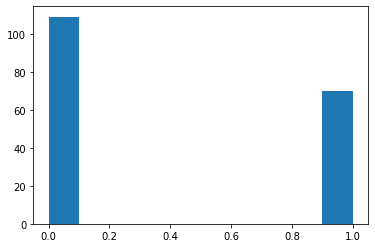

In [60]:
plt.hist(y_pred);